In [1]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D
from sklearn.preprocessing import LabelEncoder

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
X = data.drop('species', axis=1)
y = data['species']
print(y.factorize())
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64), Index(['setosa', 'versicolor', 'virginica'], dtype='object'))


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
n_feature = X_train.shape[1]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 4) (105,) (45, 4) (45,)


In [6]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(n_feature,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 1s 68ms/step - loss: 3.2626 - accuracy: 0.2952 - val_loss: 0.9668 - val_accuracy: 0.7333
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 1.1397 - accuracy: 0.4095 - val_loss: 1.0936 - val_accuracy: 0.2444
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 1.1479 - accuracy: 0.4190 - val_loss: 1.0715 - val_accuracy: 0.2444
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.9213 - accuracy: 0.4762 - val_loss: 0.8753 - val_accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.8437 - accuracy: 0.5810 - val_loss: 0.6271 - val_accuracy: 0.7556
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.6488 - accuracy: 0.7143 - val_loss: 0.5395 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6426 - accuracy: 0.6667 - val_loss: 0.4424 - val_accuracy: 1.0000
Epoch 8/50
4/4 [===========

In [10]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 1.000


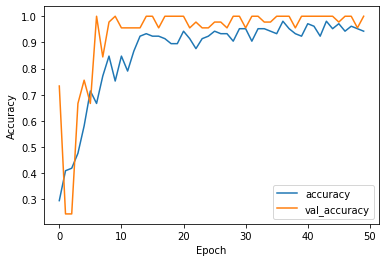

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [49]:
x = np.array([[3.1, 3.9, 3.4, 0.2]])
pred = model.predict(x)
#print(np.array(X_test))
x_pred = np.argmax(pred, axis=1)
if x_pred == 0:
    print('setosa')
elif x_pred == 1:
    print('versicolor')
else:
    print('virginica')

setosa
